# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
fun1 = lambda x: np.sign(x)*x + x**2
fun2 = lambda x: np.sign(x)*x**2
fun3 = lambda x: (abs(np.sin(5*x)))**3
fun4_1 = lambda x: 1/(1+x**2)
fun4_25 = lambda x: 1/(1+25*x**2)
fun4_100 = lambda x: 1/(1+100*x**2)
fun5 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

###### A) Interpolacja węzłami Czebyszewa rzędu n = 10

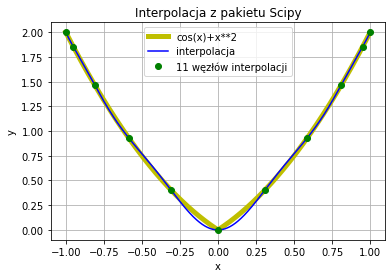

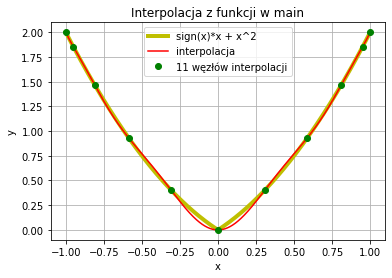

In [31]:
from scipy.interpolate import barycentric_interpolate

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
nodes = main.chebyshev_nodes(interpolation_nodes_number)
weight = main.bar_czeb_weights(interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(nodes,fun1(nodes),x)

plt.plot(x,fun1(x),'y',  linewidth=5 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'b',label = 'interpolacja')
plt.plot(nodes,fun1(nodes),'go',label = '11 węzłów interpolacji')
plt.title('Interpolacja z pakietu Scipy')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

# Moja interpolacja
yimp_1 = main.barycentric_inte(nodes, fun1(nodes), weight, x)

plt.figure()
plt.plot(x,fun1(x),'y',  linewidth=4 ,label = 'sign(x)*x + x^2')
plt.plot(x,yimp_1,'r',label = 'interpolacja')
plt.plot(nodes,fun1(nodes),'go',label = '11 węzłów interpolacji')
plt.title('Interpolacja z funkcji w main')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

###### B) Interpolacja węzłami Czebyszewa rzędu n = 100

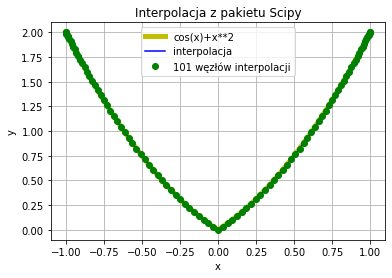

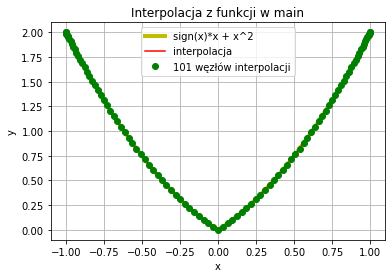

In [32]:
# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 100
nodes = main.chebyshev_nodes(interpolation_nodes_number)
weight = main.bar_czeb_weights(interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(nodes,fun1(nodes),x)

plt.plot(x,fun1(x),'y',  linewidth=5 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'b',label = 'interpolacja')
plt.plot(nodes,fun1(nodes),'go',label = '101 węzłów interpolacji')
plt.title('Interpolacja z pakietu Scipy')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

# Moja interpolacja
yimp_2 = main.barycentric_inte(nodes, fun1(nodes), weight, x)

plt.figure()
plt.plot(x,fun1(x),'y',  linewidth=4 ,label = 'sign(x)*x + x^2')
plt.plot(x,yimp_2,'r',label = 'interpolacja')
plt.plot(nodes,fun1(nodes),'go',label = '101 węzłów interpolacji')
plt.title('Interpolacja z funkcji w main')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

###### C) Interpolacja węzłami Czebyszewa rzędu n = 1000

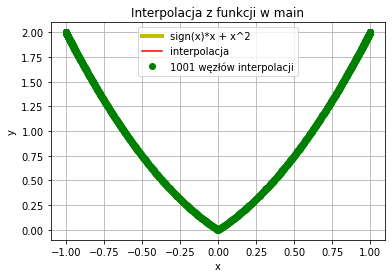

In [23]:
# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 1000
nodes = main.chebyshev_nodes(interpolation_nodes_number)
weight = main.bar_czeb_weights(interpolation_nodes_number)

# Moja interpolacja
yimp_3 = main.barycentric_inte(nodes, fun1(nodes), weight, x)

plt.figure()
plt.plot(x,fun1(x),'y',  linewidth=4 ,label = 'sign(x)*x + x^2')
plt.plot(x,yimp_3,'r',label = 'interpolacja')
plt.plot(nodes,fun1(nodes),'go',label = '1001 węzłów interpolacji')
plt.title('Interpolacja z funkcji w main')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

###### D) Interpolacja węzłami Czebyszewa rzędu n = 10000

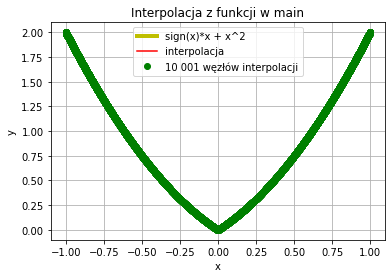

In [24]:
# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10000
nodes = main.chebyshev_nodes(interpolation_nodes_number)
weight = main.bar_czeb_weights(interpolation_nodes_number)

# Moja interpolacja
yimp_4 = main.barycentric_inte(nodes, fun1(nodes), weight, x)

plt.figure()
plt.plot(x,fun1(x),'y',  linewidth=4 ,label = 'sign(x)*x + x^2')
plt.plot(x,yimp_4,'r',label = 'interpolacja')
plt.plot(nodes,fun1(nodes),'go', label = '10 001 węzłów interpolacji')
plt.title('Interpolacja z funkcji w main')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

### Komentarz:
Dla interpolacji rzędu większego niż 900 funkcja z pakietu scipy nie radziła sobie z taką ilością punktów, dlatego nie ma dla niej odpowiednich wykresów. Można wnioskować, że funkcja napisana przez nas na zajęciach ma lepsze działanie.




***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [30]:
y_real = fun1(x)

print('Norma dla interpolacji rzędu 10: ', main.L_inf(y_real, yimp_1))
print('Norma dla interpolacji rzędu 100: ', main.L_inf(y_real, yimp_2))
print('Norma dla interpolacji rzędu 1000: ', main.L_inf(y_real, yimp_3))
print('Norma dla interpolacji rzędu 10 000: ', main.L_inf(y_real, yimp_4))

Norma dla interpolacji rzędu 10:  0.05921962436810316
Norma dla interpolacji rzędu 100:  0.00596541892441703
Norma dla interpolacji rzędu 1000:  0.0005739642836657185
Norma dla interpolacji rzędu 10 000:  8.30350512818893e-06


### Komentarz:
Jakość interpolacji rośnie wraz z ilością węzłów (rzędem interpolacji), co jest bardoz logicznym wnioskiem. Minusem uzyskania dużej dokładności interpolacji jest idąca w parze z ilością węzłówzłożonośc obliczeniowa.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

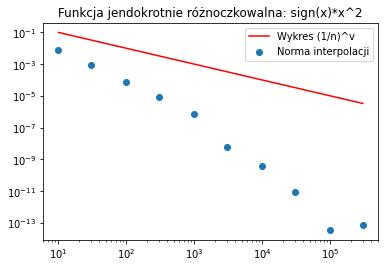

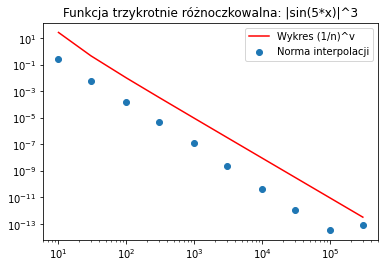

In [44]:
x = np.linspace(-1, 1, 1000)
norm_fun2 = []
norm_fun3 = []
derivative_2 = []
derivative_3 = []
n_list = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
for n in n_list:
    elem2 = main.L_inf(fun2(x), main.barycentric_inte(main.chebyshev_nodes(n), fun2(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_fun2.append(elem2)
    derivative_2.append(1/n)
    
    elem3 = main.L_inf(fun3(x), main.barycentric_inte(main.chebyshev_nodes(n), fun3(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_fun3.append(elem3)
    derivative_3.append(4*(21020)/3/np.pi/(n-3)**3)
    
plt.figure()
plt.scatter(n_list, norm_fun2, label='Norma interpolacji')
plt.plot(n_list, derivative_2, 'r', label='Wykres (1/n)^v')
plt.title('Funkcja jednokrotnie różnoczkowalna: sign(x)*x^2')
plt.legend()
plt.loglog()
plt.show()

plt.figure()
plt.scatter(n_list, norm_fun3, label='Norma interpolacji')
plt.plot(n_list, derivative_3, 'r', label='Wykres (1/n)^v')
plt.title('Funkcja trzykrotnie różnoczkowalna: |sin(5*x)|^3')
plt.legend()
plt.loglog()
plt.show()

### Komentarz:
Podobnie jak w poprzednim zadaniu, dokładność interpolacji rośnie wraz ze wzrostem rzędu interpolacji. Jak możemy zauważyć na wykresie, dla n > 100 tys. dokładność stabilizuje się na pewnej wartości, co ma związek z zerem maszynowym oraz błędem zaokrągleń. Te problemy sprawiają, że nie jesteśmy w stanie osiągnąć lepszej dokladności.

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

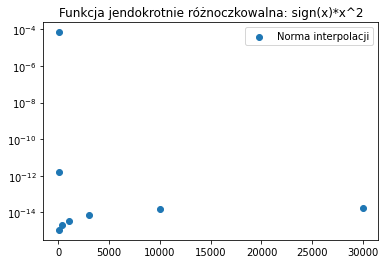

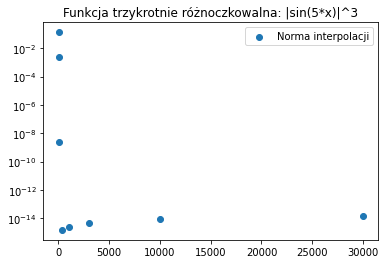

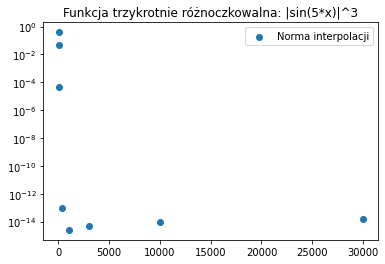

In [62]:
x = np.linspace(-1, 1, 1000)
norm_fun4_1 = []
norm_fun4_25 = []
norm_fun4_100 = []


n_list = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
for n in n_list:
    elem1 = main.L_inf(fun4_1(x), main.barycentric_inte(main.chebyshev_nodes(n), fun4_1(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_fun4_1.append(elem1)
    
    elem2 = main.L_inf(fun4_25(x), main.barycentric_inte(main.chebyshev_nodes(n), fun4_25(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_fun4_25.append(elem2)
    
    elem3 = main.L_inf(fun4_100(x), main.barycentric_inte(main.chebyshev_nodes(n), fun4_100(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_fun4_100.append(elem3)
    
plt.figure()
plt.scatter(n_list, norm_fun4_1, label='Norma interpolacji')
plt.title('Jakość interpolacji dla funkcji 1/(1+x^2)')
plt.legend()
plt.semilogy()
plt.show()

plt.figure()
plt.scatter(n_list, norm_fun4_25, label='Norma interpolacji')
plt.title('Jakość interpolacji dla funkcji 1/(1+25*x^2)')
plt.legend()
plt.semilogy()
plt.show()

plt.figure()
plt.scatter(n_list, norm_fun4_100, label='Norma interpolacji')
plt.title('Jakość interpolacji dla funkcji 1/(1+100*x^2)')
plt.legend()
plt.semilogy()
plt.show()

### Komentarz:
Tak jak w innych zadaniach możemy zaobserowować wzrost dokladności interpolacji wraz ze wzrostem jej rzędu, która zatrzymuje się na około 10e-14, co reprezentuje zero maszynowe. Niestety nie wykonałem polecenia z rysowaniem elipsy  Bernsteina -> to zadanie mnie przerosło.

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

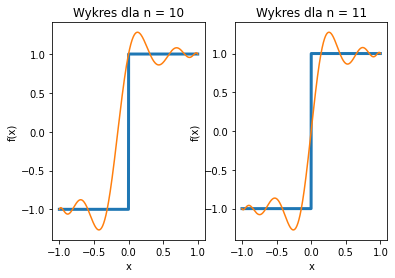

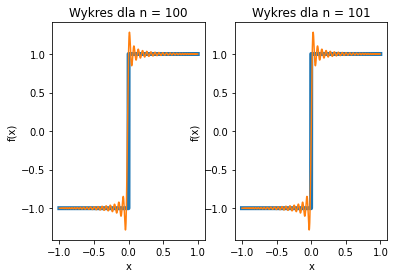

Jakość interpolacji dla n =  50  obrazuje następująca     wartość normy:  1.9774932596436843
Jakość interpolacji dla n =  51  obrazuje następująca     wartość normy:  0.9620965828709448
Jakość interpolacji dla n =  5000  obrazuje następująca     wartość normy:  0.2437720775505856
Jakość interpolacji dla n =  5001  obrazuje następująca     wartość normy:  0.053630926931458434
Jakość interpolacji dla n =  50000  obrazuje następująca     wartość normy:  0.004404736393806452
Jakość interpolacji dla n =  50001  obrazuje następująca     wartość normy:  0.01950290962902379
Jakość interpolacji dla n =  500000  obrazuje następująca     wartość normy:  0.0016727036126720218
Jakość interpolacji dla n =  500001  obrazuje następująca     wartość normy:  0.0010990181207086724


In [81]:
x = np.linspace(-1, 1, 1000)
y = fun5(x)
n_list = [10, 11, 100, 101]
yimp = []
for n in n_list:
    yimp.append(main.barycentric_inte(main.chebyshev_nodes(n), fun5(main.chebyshev_nodes(n)),
                                      main.bar_czeb_weights(n), x))


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=3)
plt.plot(x, yimp[0])
plt.title('Wykres dla n = 10')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(x, y, linewidth=3)
plt.plot(x, yimp[1])
plt.title('Wykres dla n = 11')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=4)
plt.plot(x, yimp[2])
plt.title('Wykres dla n = 100')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(x, y, linewidth=4)
plt.plot(x, yimp[3])
plt.title('Wykres dla n = 101')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

n_l = [50, 51, 5000, 5001, 50000, 50001, 500000, 500001]
for n in n_l:
    print('Jakość interpolacji dla n = ', n, ' obrazuje następująca \
    wartość normy: ', main.L_inf(fun5(x), main.barycentric_inte(main.chebyshev_nodes(n), \
    fun5(main.chebyshev_nodes(n)),main.bar_czeb_weights(n), x)))

### Komentarz:
Dla wartości n lub n+1, interpolacja jest o wiele dokładniejsza dla nieparzystego n, co widać po wyznaczeniu normy dla tych interpolacji. Niestety tę prawidłowośc zaburzają wartości dla n: 50000 i 50001 gdzie sytuacja jest odwrotna i różnią się one pięciokrotnie! Nie mam pojęcia co jest tego przyczyną. Mimo to, patrząc na wykres, można wnioskować, że ogólna reguła wynika z tego, że dla nieparzystych n jeden węzeł znajduje się w punkcie (0, 0) który jest pomiędzy wartością -1 a 1, co sprawia, że błąd się zmniejsza.

# Wnioski:

Na tym laboratorium zamoznaliśmy się z pojęciem interpolacji, którą wyliczaliśmy dla funkcji o różnyc cechach (funkcje analityczne, różniczkowalne okresloną ilość razy, funkcje nieciągłe). Nauczyliśmy się wykonywać dokładniejsze interpolacje niż te z pakietu Scipy i jedyne ograniczenia, jakie stoją na przeszkodzie jeszcze lepszej interpolacji to zero maszynowe i blędy wynikające z zaokrągleń.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)